
## Noise removal from Emnist image data with AutoEncoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


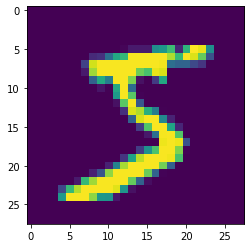

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

#### Basic AutoEncoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
783/2

391.5

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [11]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [12]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 25s 410us/sample - loss: 0.2451 - acc: 0.7913 - val_loss: 0.2159 - val_acc: 0.7899
Epoch 2/5
60000/60000 [==============================] - 22s 366us/sample - loss: 0.1879 - acc: 0.7977 - val_loss: 0.1614 - val_acc: 0.8012
Epoch 3/5
60000/60000 [==============================] - 24s 404us/sample - loss: 0.1563 - acc: 0.8028 - val_loss: 0.1482 - val_acc: 0.8017
Epoch 4/5
60000/60000 [==============================] - 27s 447us/sample - loss: 0.1463 - acc: 0.8044 - val_loss: 0.1409 - val_acc: 0.8042
Epoch 5/5
60000/60000 [==============================] - 26s 433us/sample - loss: 0.1410 - acc: 0.8054 - val_loss: 0.1374 - val_acc: 0.8051


In [19]:
passed_images = autoencoder.predict(X_test[:10])

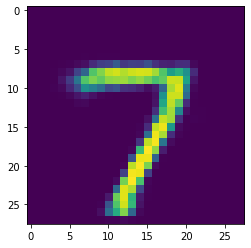

In [20]:
plt.imshow(passed_images[0])

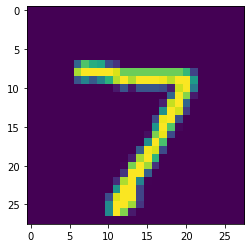

In [21]:
plt.imshow(X_test[0])

#### AutoEncoders for Denoising Images

In [29]:
from tensorflow.keras.layers import GaussianNoise
import tensorflow as tf

In [23]:
sample = GaussianNoise(0.2)

In [47]:
X_test = X_test.astype('float32') 

In [48]:
noisey = sample(X_test[0:2],training=True)

In [53]:
import tensorflow as tf
from tensorflow.python.keras import backend 

sess = backend.get_session()
noisey = sess.run(noisey)

print(type(noisey))

<class 'numpy.ndarray'>


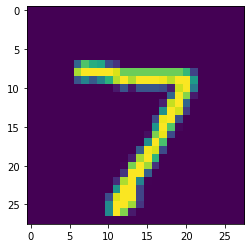

In [54]:
plt.imshow(X_test[0])

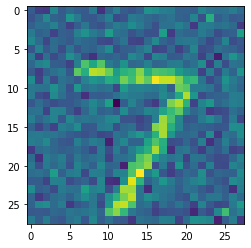

In [55]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [56]:
import tensorflow as tf
import numpy as np

In [58]:
# TO create the exact same noise as us (optional)
#tf.random.set_seed(101)
tf.random.set_random_seed(1)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [59]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [60]:
noise_remover = Sequential([encoder, decoder])

In [61]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [62]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 28s 462us/sample - loss: 0.1694 - acc: 0.8008 - val_loss: 0.1323 - val_acc: 0.8065
Epoch 2/8
60000/60000 [==============================] - 33s 544us/sample - loss: 0.1288 - acc: 0.8081 - val_loss: 0.1192 - val_acc: 0.8086
Epoch 3/8
60000/60000 [==============================] - 39s 654us/sample - loss: 0.1210 - acc: 0.8095 - val_loss: 0.1141 - val_acc: 0.8094
Epoch 4/8
60000/60000 [==============================] - 41s 689us/sample - loss: 0.1162 - acc: 0.8103 - val_loss: 0.1099 - val_acc: 0.8103
Epoch 5/8
60000/60000 [==============================] - 46s 759us/sample - loss: 0.1118 - acc: 0.8111 - val_loss: 0.1060 - val_acc: 0.8109
Epoch 6/8
60000/60000 [==============================] - 38s 638us/sample - loss: 0.1085 - acc: 0.8116 - val_loss: 0.1044 - val_acc: 0.8116
Epoch 7/8
60000/60000 [==============================] - 49s 813us/sample - loss: 0.1058 - acc: 0.8120 - val_l

In [63]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

In [65]:
import tensorflow as tf
from tensorflow.python.keras import backend 

sess = backend.get_session()
ten_noisey_images = sess.run(ten_noisey_images)

print(type(ten_noisey_images))

<class 'numpy.ndarray'>


In [67]:
import tensorflow as tf
from tensorflow.python.keras import backend 

sess = backend.get_session()
denoised = sess.run(denoised)

print(type(denoised))

<class 'numpy.ndarray'>


The Original


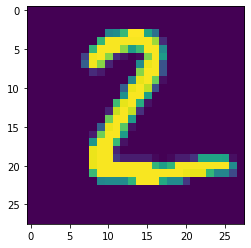

The Noisey Version


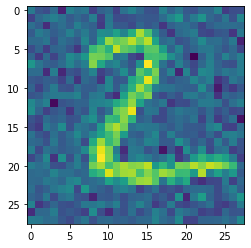

After going through denoiser


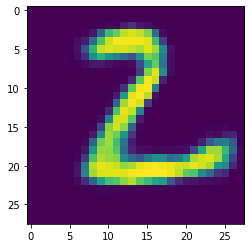

In [68]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()